T-test in Python Week 2 exercises

In [1]:
#Packages Imported
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

# What exactly are you lookign at when you perform t-tests.

What exactly is the t-test going to compare?-An independent samples t-test examines if 2 populations
have equal means on some quantitative variable. The concept is testing wheter there is a significant difference between two independent populations. You must determine what your significance level will be. I.E level at which you conclude that you reject or do not reject the null hypothesis.


**Assumptions**


**independent observations.** This often holds if each row of data represents a different person.

**Normality:** the dependent variable must follow a normal distribution in each subpopulation. This is not needed if both n ≥ 25 or so.

**Homogeneity of variances:** both subpopulations must have equal variances on the dependent variable. This is not needed if both sample sizes are roughly equal.

If sample sizes are not roughly equal, then **Levene's test** may be used to test if homogeneity is met. If that's not the case, then you should report adjusted results. 

Important: The t-test rejects or fails to reject the null hypothesis, never accepts it. Ypu will always assume the null hypothesis is correct until you have enough evidence to reject the null hypothesis.

Null hypothesis: no difference between groups.
Alternative hypothesis:: there is a difference between the groups.


### Type 1 Errors

Incorrectly reject the null hypothesis. The researcher says there is a differenc ebetween groups when there really isn't. False poitive study result. This is also known as alpha error 

### Type 2 Error

Incorrectly fail to reject the null hypothesis. This is the beta error. 

### p-value

This is the probability if obtaining a result at least as extreme as the current one, assumping that the null hypothesis is true. The interpretation could be:

Low p value --> reject null

High p value --> fail to reject the null

# Level of significance:#

What level determiens whether the p value is low or high. That is where the level of significance or alpha comes in. Alpha is the probability of making a type 1 error or the probability of incorrectly rejecting the null hypothesis. It is a selected cutt off point that determines whether we consider a p-value acceptably or low.

If the p value is < alpha. The value is statisically significant difference between groups.

If the p value > than our significance level we conclude that the observed difference between groups is not statisically significant.

Alpha is arbitraily defined as 5% or 0.05. Using a 5% alpha implies that having a 5% probability of incorrectly rejecting the null hypothesis is acceptable.

Therefore:

if p-value <0.05 --> statisical significant difference --> reject null hypothesis

if p-value >0.05 --> no statiscal significance difference --> cannot reject the null hypothesis

# Statistical Hypothesis Testing:#

T-Test- compares 2 means

Anova - compares > 2 means 

Chi-Squared - compares categorical variables.



# Types of T-tests#

A T-Test is only valid and should be done when means of only two categories or groups need to be compared. As soon as the number of comparisons to be made is more than two, conducting this test is not recommended.

• One-sample is used to find out the mean or average of one group to compare it against the set average.

• An independent Two-Sample test is conducted when samples from two different groups, species, or populations are studied and compared.

• Paired Sample is the hypothesis testing conducted when two groups belong to the same population or group.

• Equal Variance is conducted when the sample size in each group or population is the same, or the variance of the two data sets is similar.

• Unequal Variance is used when the variance and the number of samples in each group are different.



In [2]:
# Getting started with constructing and carrying out t-tests using python langauge and scipy.
# create a dataset to use for the t-tests.

#parameters for two different populations. These will be the mean and the standard deviation.

meana,stda,meanb,stdb = 7.0,0.9,8.0,1.1

# sample size

N=50

#create two lists of numbers based on bell-shaped probability curves using the numpy random module inported above
a= np.random.normal( loc= meana, scale = stda, size = N)
b = np.random.normal( loc= meanb, scale = stdb, size = N)

#create datafram using both populations
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

#look at the dataframe
df


,Category,Value
0,A,7.063968
1,A,7.857751
2,A,8.449157
3,A,6.799308
4,A,7.606760
...,...,...
95,B,8.624467
96,B,6.295473
97,B,7.293440
98,B,8.492281


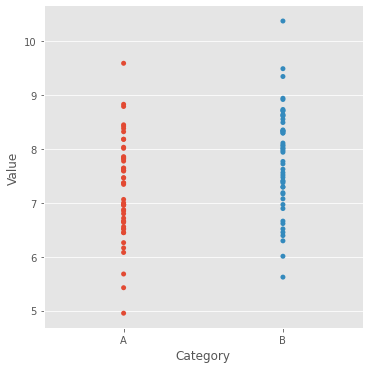

In [3]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

#import plotly.plotly as py
#https://plotly.com/python/v3/t-test/-T-Test in Python/v3
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot as py
from plotly.tools import FigureFactory as FF
#from _plotly_future_ import _chart_studio_error as py
import numpy as np
import pandas as pd
import scipy
from scipy import stats as ss

data1 = np.random.normal(7, 0.9, size=50)
data2 = np.random.normal(8, 1.1, size=50)

x = np.linspace(-4, 4, 160)
y1 = ss.norm.pdf(x)
y2 = ss.norm.pdf(x, loc=2)



trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

data = [trace1, trace2]

py.iplot(data, filename='normal-dists-plot')

In [4]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -2.894597712498434	p-value: 0.0046801223576411755
P_scipy: 0.00


In [5]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -2.8945977124984394	p-value: 0.004680122357641093	Deg Free: 98.0
P_statsmodels: 0.00


In [13]:
#Calculate t statistic "by hand".
# https://en.wikipedia.org/wiki/Test_statistic

# Length of the arrays.
n1 = len(a)
n2 = len(b)

# Means of the samples.
m1 = np.sum(a) / n1
m2 = np.sum(b) / n2

# Sample standard deviations.
s1 = np.sqrt(np.sum((a - m1)**2) / (n1 - 1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n2 - 1))

df = n1 + n2 - 2
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1 - m2) / (np.sqrt(sp2) * np.sqrt(1.0/n1 + 1.0/n2))

t

-2.8945977124984337

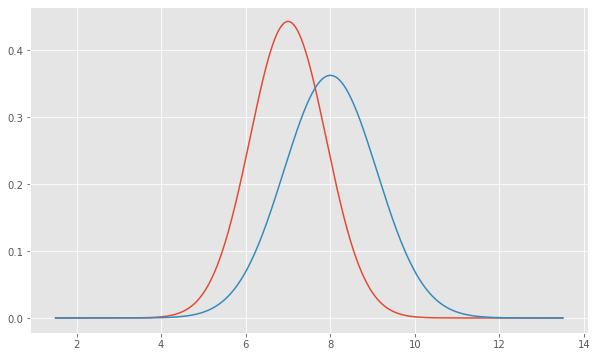

In [8]:
# Let's create a plot with the following x values.
min_x = min(meana, meanb) - 5.0 * max(stda, stdb)
max_x = max(meana, meanb) + 5.0 * max(stda, stdb)
x = np.linspace(min_x, max_x, 1000)

# We'll have plots of two different populations on one set of axes.
# These are normal probability density functions.
# See: https://en.wikipedia.org/wiki/Normal_distribution
y_a = ss.norm.pdf(x, meana, stda)
y_b = ss.norm.pdf(x, meanb, stdb)

# Create and show the plot.
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y_a)
ax.plot(x, y_b)
plt.show()

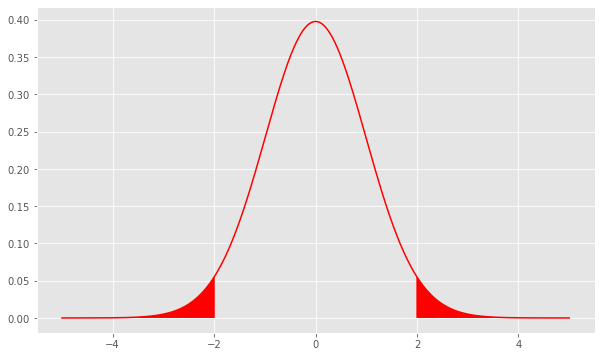

In [14]:
# Critical Value #

# The critical probability value.
critical = 0.05

# Create the figure.
fig, ax = plt.subplots(figsize=(10,6))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t, color='red')

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor="red")
ax.fill_between(tail_two['x'], tail_two['t'], 0, facecolor="red")

plt.show()

# Type 1 error #

In [15]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.92%


# Type II errors #

Incorrectly fail to reject the null hypothesis. 

In [17]:
#Let's run 10000 t-tests where the population means are NOT equal.
# How often will we not reject the hypothesis?

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.1, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
notrejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is greater than critical, do not reject.
    if p > critical:
        notrejects = notrejects + 1

# Print results.
typeii = 100.0 * (notrejects / trials)
print(f"{typeii:0.2f}%")

35.69%


In [31]:
from scipy import stats

rng = np.random.default_rng(12345) # SET SEED FOR REPRODUCIBILITY

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)
stats.ttest_ind(rvs1, rvs2, equal_var=False)


Ttest_indResult(statistic=-0.664108846106885, pvalue=0.5067741655938489)

### References
https://www.youtube.com/watch?v=CIbJSX-biu0- Python for Data Analysis: Hypothesis Testing and T-Tests

https://www.markdownguide.org/basic-syntax/

https://www.youtube.com/watch?v=I10q6fjPxJ0- Statistics made easy ! ! ! Learn about the t-test, the chi square test, the p value and more

https://www.youtube.com/watch?v=YSwmpAmLV2s-  Null Hypothesis, p-Value, Statistical Significance, Type 1 Error and Type 2 Error

https://www.wallstreetmojo.com/t-test/  T-Test Meaning

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random numpy.random.Generator.random

https://plotly.com/python/v4-migration/ Version 4 Migration Guide in Python

https://uc-r.github.io/t_test t-test: Comparing Group Means